In [167]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import newton

from utils import *

from ipywidgets import interact

import torch
from torch import nn
import torch.nn.functional as F

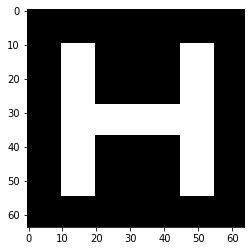

In [168]:
spread = [10,10]
size = 64
shape = (size, size)
pixels = shape[0] * shape[1]

x_true = build_x_true().reshape(-1,1)

plt.imshow(im(x_true, shape), cmap='Greys_r')

In [169]:
Q,H = arnoldi(x_true.reshape(shape)+1, n=10, q_0 = x_true.reshape(shape)[:,0].reshape(-1,1)+1)

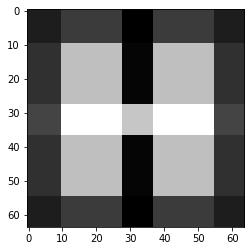

In [170]:
plt.imshow( (Q @ H @ Q[:,:-1].T) , cmap='Greys_r')

In [171]:
(H @ Q[:,:-1].T).shape

(11, 64)

In [172]:
class MatrixFactorization(torch.nn.Module):
    def __init__(self, rows, cols, n_factors=10):
        super().__init__()
        self.row_embedding = torch.nn.parameter.Parameter(torch.rand(rows, n_factors), requires_grad=True)
        self.col_embedding = torch.nn.parameter.Parameter(torch.rand(n_factors, cols), requires_grad=True)

    def forward(self):
        return torch.matmul( self.row_embedding, self.col_embedding )

In [173]:
mf = MatrixFactorization(64, 64, 10)

In [174]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(mf.parameters(), lr=0.001)

In [175]:
im_true = torch.Tensor(x_true.reshape(shape))

In [176]:
for epoch in range(1000):
    
    optimizer.zero_grad()

    output = mf.forward()
    loss = criterion(output,im_true)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(loss)

tensor(5.6605, grad_fn=<MseLossBackward0>)
tensor(2.5533, grad_fn=<MseLossBackward0>)
tensor(1.3177, grad_fn=<MseLossBackward0>)
tensor(0.7771, grad_fn=<MseLossBackward0>)
tensor(0.5127, grad_fn=<MseLossBackward0>)
tensor(0.3692, grad_fn=<MseLossBackward0>)
tensor(0.2834, grad_fn=<MseLossBackward0>)
tensor(0.2272, grad_fn=<MseLossBackward0>)
tensor(0.1876, grad_fn=<MseLossBackward0>)
tensor(0.1577, grad_fn=<MseLossBackward0>)


In [177]:
torch.linalg.norm((mf.row_embedding @ mf.col_embedding) - im_true)

tensor(23.4484, grad_fn=<CopyBackwards>)

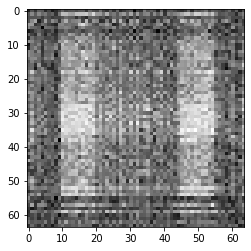

In [178]:
plt.imshow( (mf.row_embedding @ mf.col_embedding).detach().numpy() , cmap='Greys_r')

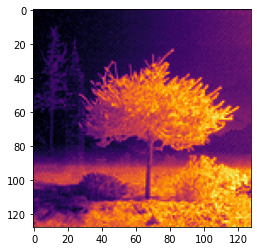

In [179]:
from matplotlib.image import imread

data = imread('../data/glitchy_tree_cropped.png').sum(axis=2)
im_true = torch.Tensor(data/data.max())

plt.imshow(im_true.detach().numpy(), 'inferno')

In [180]:
mf = MatrixFactorization(128, 128, 30)

In [191]:
import torch.optim as optim

criterion = nn.MSELoss()

def laplacian_loss(X):
    added_dims = torch.unsqueeze(torch.unsqueeze(X,dim=0),dim=0)
    laplacian_kernel = torch.Tensor([[ [[0.,-1.,0.],[-1.,2.,-1.],[0.,-1.,0.]] ]])

    return F.conv2d(added_dims, laplacian_kernel).pow(2).sum()
    
optimizer = optim.Adam(mf.parameters(), lr=0.001)

In [192]:
for epoch in range(10000):
    
    optimizer.zero_grad()

    output = mf.forward()
    loss = criterion(output, im_true) + 0.00001*laplacian_loss(output)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(loss)

tensor(0.1442, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<AddBackward0>)
tensor(0.1440, grad_fn=<A

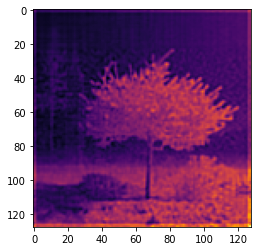

In [193]:
plt.imshow(output.detach().numpy(), 'inferno')

In [194]:
torch.linalg.norm((mf.row_embedding @ mf.col_embedding) - im_true)

tensor(30.4613, grad_fn=<CopyBackwards>)